# Integração Parte 1 - Python para "Criar" Bases de Dados

### Qual arquivo vamos importar?

- Vamos usar o mesmo exemplo que usamos da empresa Contoso no módulo de Análise de Dados

Temos 4 arquivos diferentes:
- Vendas
- Lojas
- Clientes
- Produtos

E vamos integrar eles em 1 arquivo único apenas com as informações relevantes. Depois, vamos importar essa base tratada para o Power BI

In [1]:
import pandas as pd
import os
#importando os arquivos
caminho_padrao = r'C:\Users\kaio.siqueira\OneDrive - LTM Office365\Documentos\PythonCurso\python_hashtag\Powerbi'
vendas_df = pd.read_csv(os.path.join(caminho_padrao, r'Contoso - Vendas - 2017.csv'), sep=';')
produtos_df = pd.read_csv(os.path.join(caminho_padrao, r'Contoso - Cadastro Produtos.csv'), sep=';',encoding='ISO-8859-1')
lojas_df = pd.read_csv(os.path.join(caminho_padrao, r'Contoso - Lojas.csv'), sep=';',encoding='ISO-8859-1')
clientes_df = pd.read_csv(os.path.join(caminho_padrao, r'Contoso - Clientes.csv'), sep=';',encoding='ISO-8859-1')

#renomeando as colunas
clientes_df.rename(columns={'ÿID Cliente': 'ID Cliente'}, inplace=True)
produtos_df.rename(columns={'ÿNome do Produto': 'Nome do Produto'}, inplace=True)
lojas_df.rename(columns={'ÿID Loja': 'ID Loja'}, inplace=True)
#limpando apenas as colunas que queremos
clientes_df = clientes_df[['ID Cliente', 'E-mail']]
produtos_df = produtos_df[['ID Produto', 'Nome do Produto']]
lojas_df = lojas_df[['ID Loja', 'Nome da Loja']]
clientes_df
#mesclando e renomeando os dataframes
vendas_df = vendas_df.merge(produtos_df, on='ID Produto')
vendas_df = vendas_df.merge(lojas_df, on='ID Loja')
vendas_df = vendas_df.merge(clientes_df, on='ID Cliente').rename(columns={'E-mail': 'E-mail do Cliente'})
display(vendas_df)

C:\Users\kaio.siqueira\AppData\Local\Temp\ipykernel_25316\1879945528.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,Numero da Venda,Data da Venda,Data do Envio,ID Canal,ID Loja,ID Produto,ID Promocao,ID Cliente,Quantidade Vendida,Quantidade Devolvida,Nome do Produto,Nome da Loja,E-mail do Cliente
0,1,01/01/2017,02/01/2017,1,86,981,2,6825,9,1,A. Datum Advanced Digital Camera M300 Pink,Loja Contoso Austin,rbrumfieldmy@ameblo.jp
1,2,01/01/2017,06/01/2017,5,308,1586,2,18469,9,1,SV DVD 55DVD Storage Binder M56 Black,Loja Contoso North America Reseller,cshawd4@technorati.com
2,3,01/01/2017,01/01/2017,0,294,1444,5,19730,13,1,"The Phone Company Touch Screen Phones 26-2.2"" ...",Loja Contoso Tehran No.2,kgorriekd@bandcamp.com
3,4,01/01/2017,01/01/2017,0,251,1468,5,29326,6,1,Contoso Touch Screen Phones - CRT M11 Black,Loja Contoso Singapore,angela49@adventure-works.com
4,5,01/01/2017,07/01/2017,6,94,1106,2,22617,4,1,Contoso SLR Camera M146 Orange,Loja Contoso Grand Prairie,jacob4@adventure-works.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...
980637,980638,31/12/2017,31/12/2017,0,194,2490,4,10353,120,0,Contoso Rubberized Skin BlackBerry E100 White,Loja Contoso Ridgely,ocrosson9u@illinois.edu
980638,980639,31/12/2017,06/01/2018,6,32,2488,4,31750,120,0,Contoso Rubberized Skin BlackBerry E100 Black,Loja Contoso Milliken,victor11@adventure-works.com
980639,980640,31/12/2017,03/01/2018,3,210,2511,10,12003,80,0,Contoso Original K1m Li-Ion Standard Battery E...,Loja Contoso Cheshire,mtopaz4@gmpg.org
980640,980641,31/12/2017,31/12/2017,0,53,436,4,25550,39,0,Adventure Works Desktop PC1.80 ED180 White,Loja Contoso East Troy,lance5@adventure-works.com


In [2]:
#Loja Contoso Austin, Loja Contoso North America Reseller,Loja Contoso Singapore

dataset = vendas_df
vendas_df_filtro = dataset[dataset['ID Loja'].isin([86,306,172])]
vendas_df_filtro

,Numero da Venda,Data da Venda,Data do Envio,ID Canal,ID Loja,ID Produto,ID Promocao,ID Cliente,Quantidade Vendida,Quantidade Devolvida,Nome do Produto,Nome da Loja,E-mail do Cliente
0,1,01/01/2017,02/01/2017,1,86,981,2,6825,9,1,A. Datum Advanced Digital Camera M300 Pink,Loja Contoso Austin,rbrumfieldmy@ameblo.jp
98,99,01/01/2017,03/01/2017,2,306,1269,10,26238,8,0,Contoso Carrying Case E312 Blue,Loja Contoso Europe Online,edward17@adventure-works.com
125,126,01/01/2017,01/01/2017,0,172,1078,2,11357,4,0,Contoso SLR Camera M142 Black,Loja Contoso Hartford,bsunners9y@blog.com
126,127,01/01/2017,01/01/2017,0,172,1648,2,16740,4,0,Contoso DVD 7-Inch Player Portable E200 Black,Loja Contoso Hartford,gjewsterkm@indiegogo.com
165,166,01/01/2017,02/01/2017,1,306,1107,10,7242,16,0,"Contoso SLR Camera 35"" M358 Orange",Loja Contoso Europe Online,khanhard6r@taobao.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...
980579,980580,31/12/2017,06/01/2018,6,306,771,10,6539,8,0,Contoso USB Wave Multi-media Keyboard E280 Black,Loja Contoso Europe Online,hgauntleyf0@smh.com.au
980580,980581,31/12/2017,01/01/2018,1,306,591,10,32061,8,0,Contoso Projector 480p M480 White,Loja Contoso Europe Online,gina18@adventure-works.com
980581,980582,31/12/2017,31/12/2017,0,306,1388,10,22838,8,0,Contoso Private Branch Exchange M88 Grey,Loja Contoso Europe Online,alexa14@adventure-works.com
980582,980583,31/12/2017,03/01/2018,3,306,1354,10,33450,8,0,Contoso Hybrid system M60 White,Loja Contoso Europe Online,alexis3@adventure-works.com


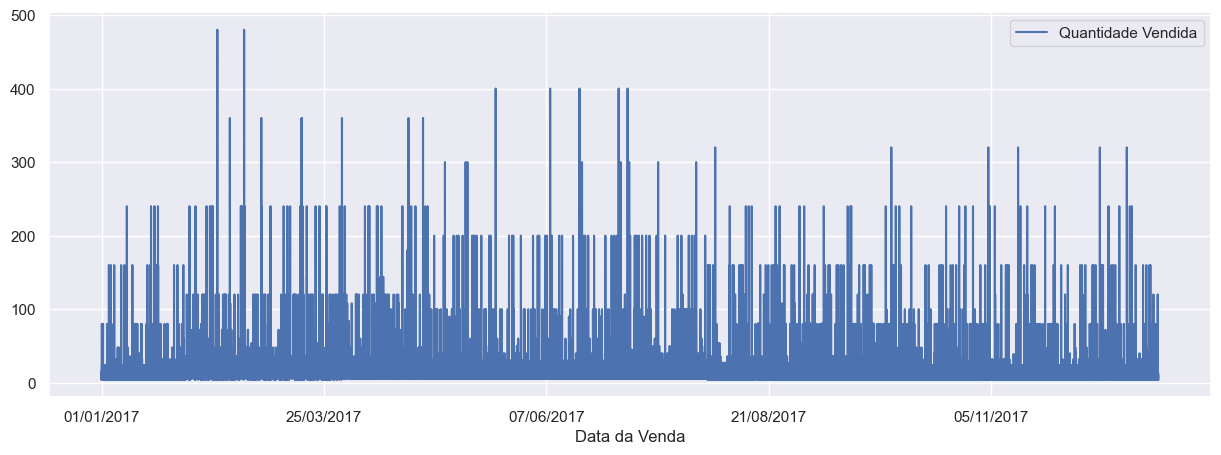

In [18]:
import matplotlib.pyplot as plt

vendas_df_filtro.plot(x="Data da Venda",y="Quantidade Vendida",figsize=(15,5))
plt.show()

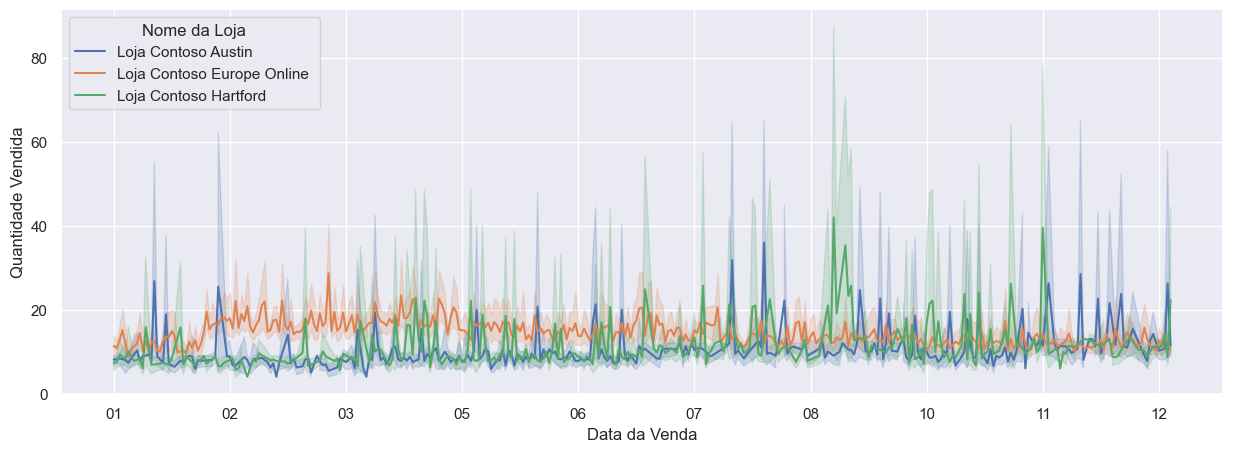

In [20]:
dataset = vendas_df_filtro

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

fig,ax = plt.subplots(figsize=(15,5))

ax.xaxis.set_major_locator(plt.MaxNLocator(12))

ax.xaxis.set_major_formatter(DateFormatter("%m"))

sns.set_theme(style="darkgrid")
sns.lineplot(x='Data da Venda',y='Quantidade Vendida',hue='Nome da Loja',data=dataset)

plt.show()